# **Question 5**

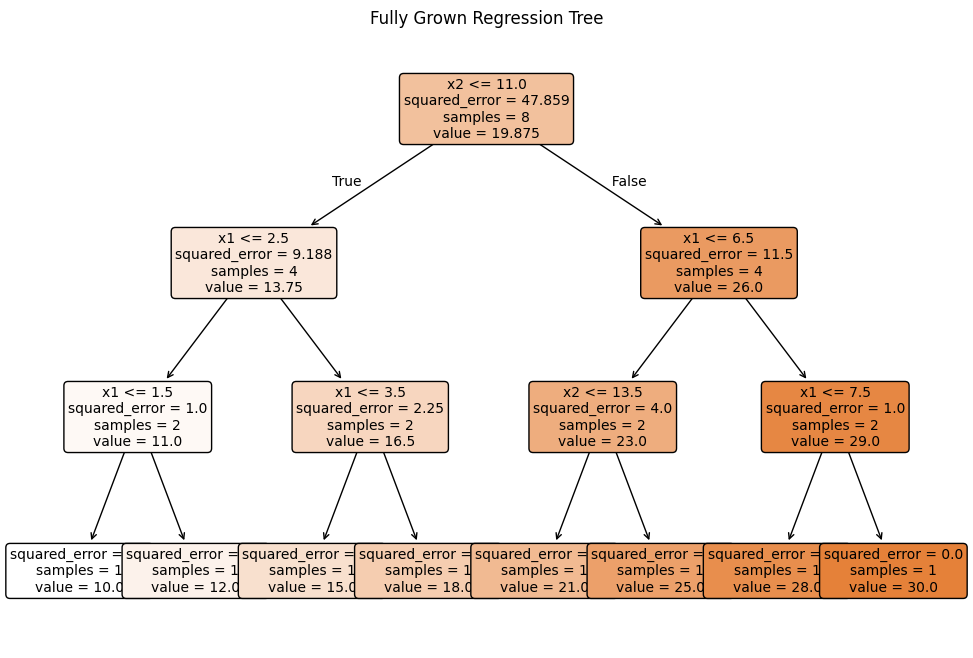

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree

x1 = [1, 2, 3, 4, 5, 6, 7, 8]
x2 = [5, 6, 8, 10, 12, 15, 18, 20]
y  = [10, 12, 15, 18, 21, 25, 28, 30]

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
X = df[['x1', 'x2']]
y = df['y']

dt = DecisionTreeRegressor(random_state=0)
dt.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(dt,
          feature_names=['x1', 'x2'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Fully Grown Regression Tree")
plt.show()

# **Question 6**

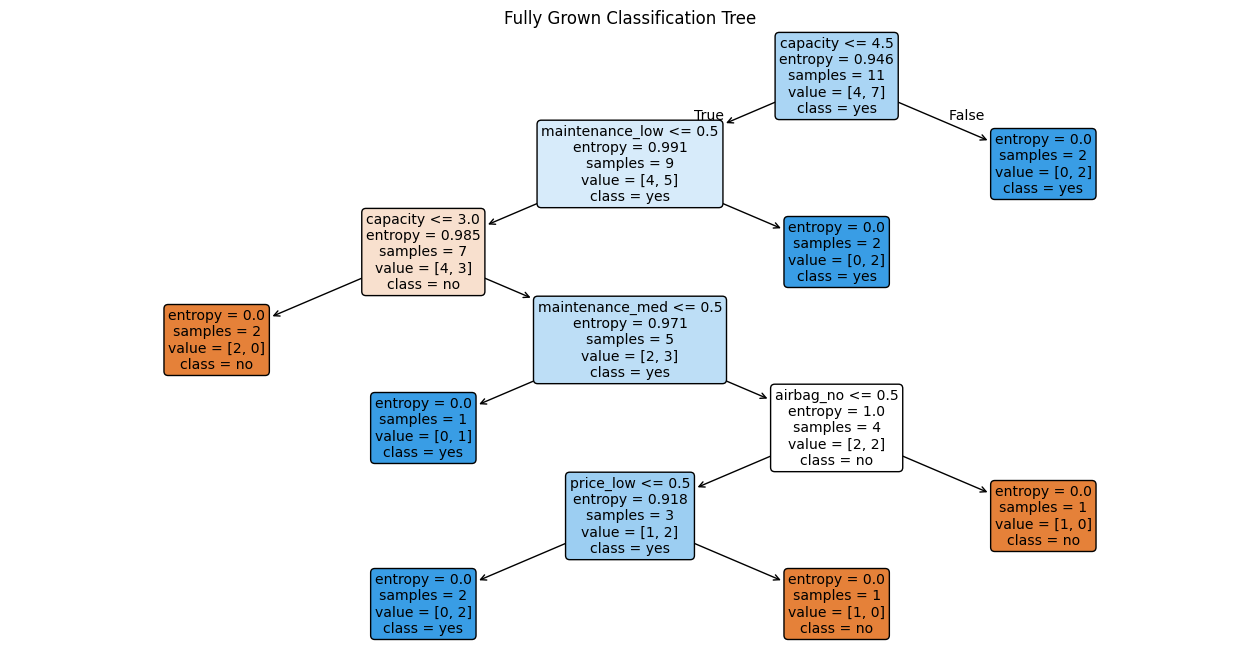

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data1 = {
    'price':       ['low', 'low', 'low', 'low', 'med', 'med', 'med', 'med', 'high', 'high', 'high'],
    'maintenance': ['low', 'med', 'low', 'high', 'med', 'med', 'high', 'high', 'med', 'high', 'high'],
    'capacity':    [2, 4, 4, 4, 4, 4, 2, 5, 4, 2, 5],
    'airbag':      ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes'],
    'profitable':  ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes']
}
df1 = pd.DataFrame(data1)
x = df1.drop(columns=['profitable'])
df1_encoded = pd.get_dummies(x)
y = df1['profitable'].map({'yes': 1, 'no': 0})

classificationtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
classificationtree.fit(df1_encoded,y)

plt.figure(figsize=(16,8))
plot_tree(classificationtree, feature_names=df1_encoded.columns, class_names=['no','yes'], filled= True, rounded= True)
plt.title('Fully Grown Classification Tree')
plt.show()

# **Question 7**

Saving A4_test.csv to A4_test (3).csv
Saving A4_train.csv to A4_train (3).csv


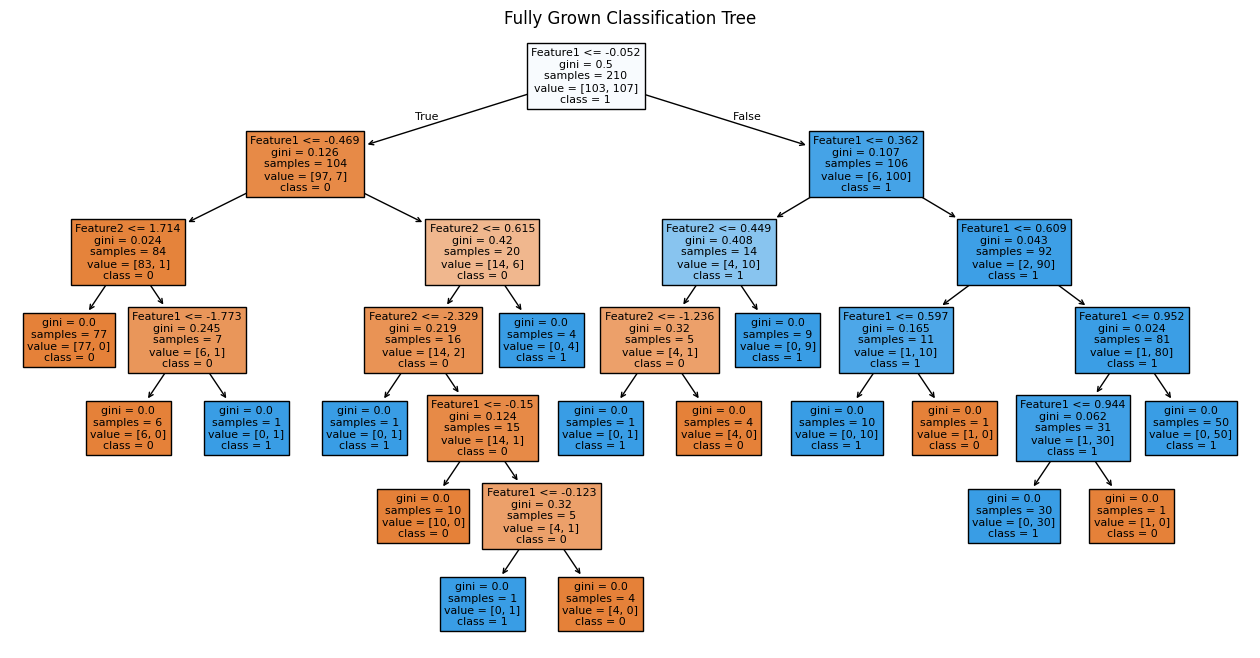

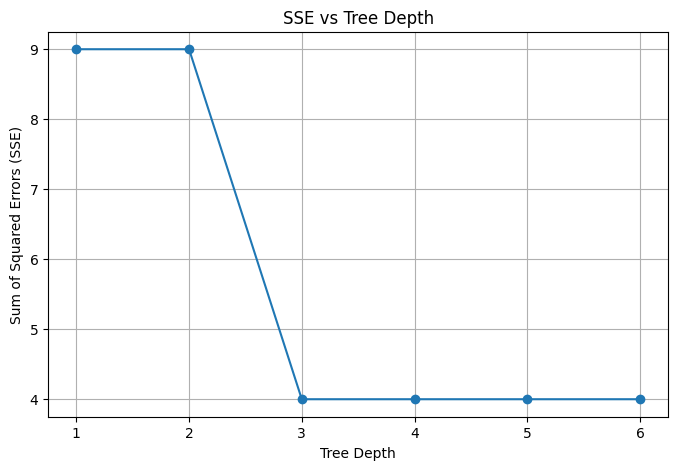

Optimal Pruning Depth: 2


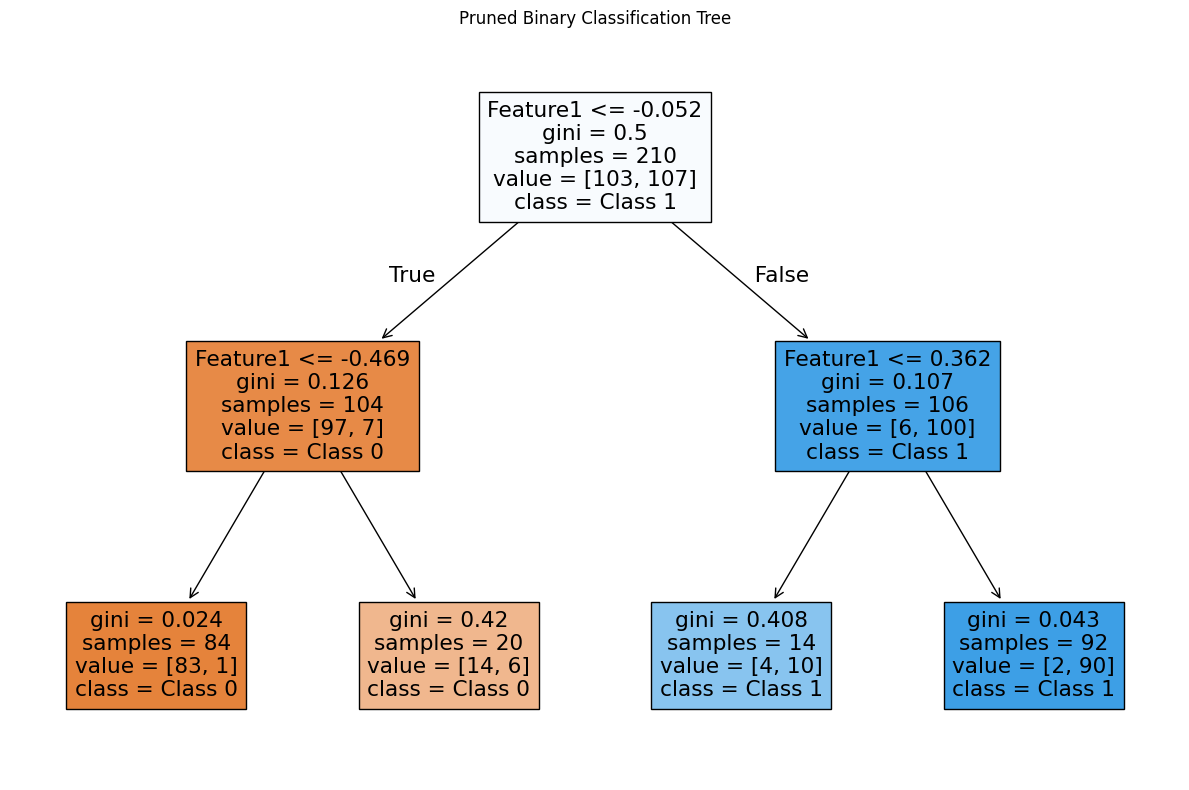

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from google.colab import files
uploaded = files.upload()

train = pd.read_csv("A4_train.csv")
test = pd.read_csv("A4_test.csv")
x_train = train[['Feature1', 'Feature2']]
y_train = train['Label']
x_test = test[['Feature1', 'Feature2']]
y_test = test['Label']

# Training Decision Tree
clf_full = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_full.fit(x_train, y_train)
plt.figure(figsize=(16, 8))
plot_tree(clf_full, feature_names=['Feature1', 'Feature2'], class_names=['0', '1'], filled=True)
plt.title("Fully Grown Classification Tree")
plt.show()

# Computing SSE
max_depth = clf_full.get_depth()
sse_list = []

for depth in range(1, max_depth + 1):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    sse = np.sum((y_test - y_pred) ** 2)
    sse_list.append(sse)

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_depth + 1), sse_list, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("SSE vs Tree Depth")
plt.grid(True)
plt.show()

# Determining optimal pruning depth (where SSE change is minimal)
depths = range(1, clf.get_depth() + 1)
optimal_depth = depths[np.argmin(np.diff(sse_list))]
print(f"Optimal Pruning Depth: {optimal_depth}")

# Visualizing the pruned tree at optimal depth
clf_pruned_optimal = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)
clf_pruned_optimal.fit(x_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_pruned_optimal, feature_names=x_train.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Pruned Binary Classification Tree")
plt.tight_layout()
plt.show()